In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import numpy as np
import torch
from dotenv import load_dotenv
from pathlib import Path
import os
load_dotenv()
session_A = 501704220  # This is three session A
session_B = 501559087
session_C = 501474098
allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')
boc = BrainObservatoryCache(manifest_file=str(
        Path(allen_cache_path) / Path('brain_observatory_manifest.json')))
raw_data_dct = {}
movie_one_dataset = boc.get_ophys_experiment_data(session_A)
raw_data_dct['natural_movie_one'] = movie_one_dataset.get_stimulus_template(
        'natural_movie_one')
natural_stimuli = boc.get_ophys_experiment_data(session_B)
raw_data_dct['natural_scenes'] = natural_stimuli.get_stimulus_template(
        'natural_scenes')


In [5]:
raw_data_dct['natural_scenes']

array([[[165., 165., 165., ...,  69.,  54.,  54.],
        [165., 165., 165., ...,  69.,  54.,  54.],
        [165., 165., 165., ...,  69.,  54.,  54.],
        ...,
        [144., 144., 144., ..., 161., 197., 197.],
        [131., 131., 131., ..., 231., 244., 244.],
        [131., 131., 131., ..., 231., 244., 244.]],

       [[ 77.,  77.,  77., ...,  79.,  95.,  95.],
        [ 77.,  77.,  77., ...,  79.,  95.,  95.],
        [ 77.,  77.,  77., ...,  79.,  95.,  95.],
        ...,
        [ 63.,  63.,  63., ...,  86.,  87.,  87.],
        [ 70.,  70.,  70., ...,  47.,  51.,  51.],
        [ 70.,  70.,  70., ...,  47.,  51.,  51.]],

       [[193., 193., 193., ..., 178., 186., 186.],
        [193., 193., 193., ..., 178., 186., 186.],
        [193., 193., 193., ..., 178., 186., 186.],
        ...,
        [176., 176., 176., ..., 218., 215., 215.],
        [173., 173., 173., ..., 211., 211., 211.],
        [173., 173., 173., ..., 211., 211., 211.]],

       ...,

       [[ 64.,  64.,  64

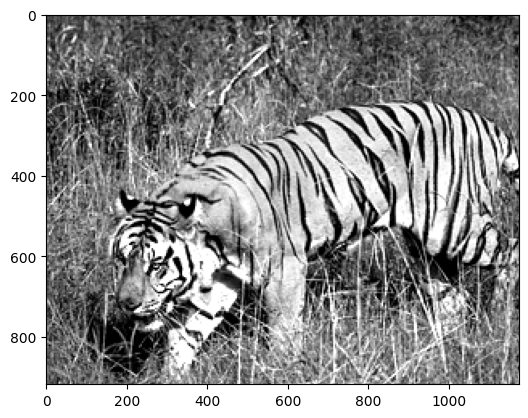

In [20]:
import matplotlib.pyplot as plt
plt.imshow(raw_data_dct['natural_scenes'][10, :, :], cmap='gray')    

In [ ]:
labels=['bear','bear','bear','turtle','bird','lion','lion', 'lion', 'elephant', 'elephant', 'tiger']

In [9]:
import pickle
dat=pickle.load(open('/home/maria/Documents/HuggingMouseData/TransformerEmbeddings/openai_clip-vit-base-patch32_embeddings.pkl','rb'))
dat.keys()

dict_keys(['natural_movie_one', 'natural_movie_two', 'natural_movie_three', 'natural_scenes'])

{'lion': array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337]), 'bear': array([-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004]), 'tiger': array([-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783]), 'turtle': array([-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ]), 'bird': array([ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272]), 'elephant': array([ 0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375])}


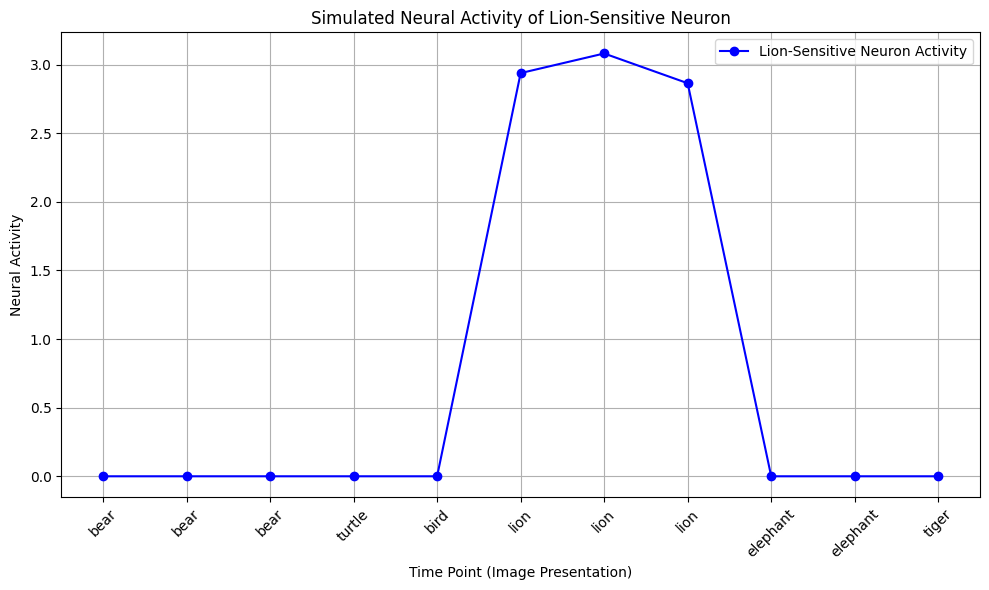

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sample labels for the images
labels = ['bear','bear','bear','turtle','bird','lion','lion', 'lion', 'elephant', 'elephant', 'tiger']

# Create a dictionary to assign an embedding for each label (as vectors, for simplicity let's use random embeddings)
np.random.seed(42)  # For reproducibility
embeddings = {label: np.random.randn(5) for label in set(labels)}
print(embeddings)
# Define the weight vector for the lion-sensitive neuron
# We will assume the "lion" embedding defines the neuron selectivity
w_lion = embeddings['lion']

# Dot product with each embedding will generate the base response of the neuron
def compute_neural_activity(embedding, w_lion, bias=0.0, noise_std=0.1):
    """
    Compute neural activity as a dot product between the embedding and the weight vector of the neuron,
    adding some noise to simulate variability in neural responses.
    """
    # Base neural response (dot product) + bias
    response = np.dot(embedding, w_lion) + bias
    # Add noise (Gaussian)
    noisy_response = response + np.random.normal(0, noise_std)
    # Non-linearity (ReLU activation function)
    activity = max(0, noisy_response)
    
    return activity

# Simulate neural activity for each image
neural_activities = []
for label in labels:
    embedding = embeddings[label]
    activity = compute_neural_activity(embedding, w_lion)
    neural_activities.append(activity)

# Plot the results
time_points = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.plot(time_points, neural_activities, marker='o', linestyle='-', color='b', label='Lion-Sensitive Neuron Activity')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neural Activity')
plt.title('Simulated Neural Activity of Lion-Sensitive Neuron')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


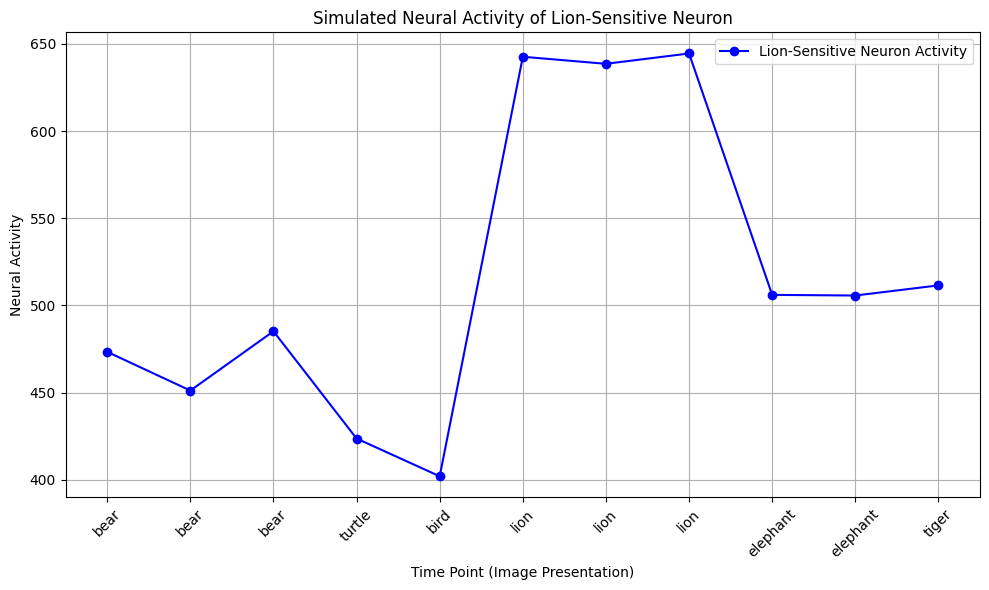

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Provided labels for the images
labels = ['bear', 'bear', 'bear', 'turtle', 'bird', 'lion', 'lion', 'lion', 'elephant', 'elephant', 'tiger']

# Embeddings for the images (assuming this is a numpy array)
# embeddings should be extracted from the dataset and have shape (len(labels), embedding_dim)
# For this example, I assume dat['natural_scenes'][:len(labels)] already contains embeddings
# embeddings = dat['natural_scenes'][:len(labels)]  # Uncomment this when you have the actual data
# For demonstration, let’s assume embeddings is a numpy array with the same length as the labels

# Assuming dat['natural_scenes'] contains 5-dimensional embeddings
# Here we simulate this array for demonstration (replace this with actual data)
np.random.seed(42)
embeddings = dat['natural_scenes'][:len(labels)]  # Assuming this is the actual data

# Identify the lion embeddings (based on the indices where the label is 'lion')
lion_indices = [i for i, label in enumerate(labels) if label == 'lion']

# Let's assume the neuron is sensitive to 'lion' images, we can create a weight vector that is related to lion images
# For simplicity, we will take the mean of the lion embeddings to define the 'lion-sensitive' weight vector
w_lion = np.mean(embeddings[lion_indices], axis=0)

# Dot product with each embedding will generate the base response of the neuron
def compute_neural_activity(embedding, w_lion, bias=0.0, noise_std=0.2):
    """
    Compute neural activity as a dot product between the embedding and the weight vector of the neuron,
    adding some noise to simulate variability in neural responses.
    """
    # Base neural response (dot product) + bias
    response = np.dot(embedding, w_lion) + bias
    # Add noise (Gaussian)
    noisy_response = response + np.random.normal(0, noise_std)
    # Non-linearity (ReLU activation function)
    activity = max(0, noisy_response)
    
    return activity

# Simulate neural activity for each image
neural_activities = []
for embedding in embeddings:
    activity = compute_neural_activity(embedding, w_lion)
    neural_activities.append(activity)

# Plot the results
time_points = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.plot(time_points, neural_activities, marker='o', linestyle='-', color='b', label='Lion-Sensitive Neuron Activity')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neural Activity')
plt.title('Simulated Neural Activity of Lion-Sensitive Neuron')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117]


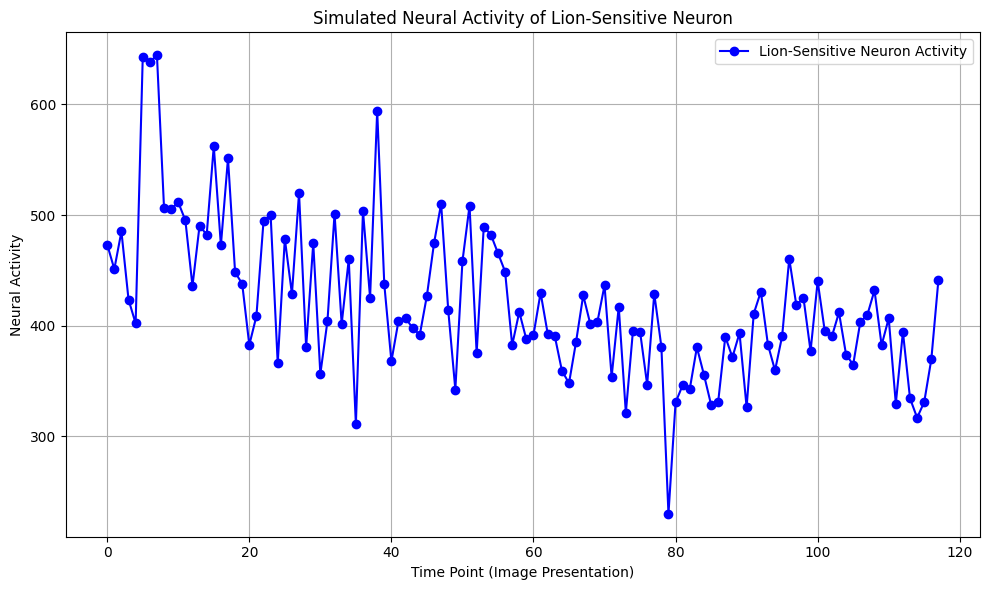

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Provided labels for the images
labels = ['bear', 'bear', 'bear', 'turtle', 'bird', 'lion', 'lion', 'lion', 'elephant', 'elephant', 'tiger']

# Embeddings for the images (assuming this is a numpy array)
# embeddings should be extracted from the dataset and have shape (len(labels), embedding_dim)
# For this example, I assume dat['natural_scenes'][:len(labels)] already contains embeddings
# embeddings = dat['natural_scenes'][:len(labels)]  # Uncomment this when you have the actual data
# For demonstration, let’s assume embeddings is a numpy array with the same length as the labels

# Assuming dat['natural_scenes'] contains 5-dimensional embeddings
# Here we simulate this array for demonstration (replace this with actual data)
np.random.seed(42)
embeddings = dat['natural_scenes'][:]  # Assuming this is the actual data

# Identify the lion embeddings (based on the indices where the label is 'lion')
lion_indices = [i for i, label in enumerate(labels) if label == 'lion']

# Let's assume the neuron is sensitive to 'lion' images, we can create a weight vector that is related to lion images
# For simplicity, we will take the mean of the lion embeddings to define the 'lion-sensitive' weight vector
w_lion = np.mean(embeddings[lion_indices], axis=0)

# Dot product with each embedding will generate the base response of the neuron
def compute_neural_activity(embedding, w_lion, bias=0.0, noise_std=0.2):
    """
    Compute neural activity as a dot product between the embedding and the weight vector of the neuron,
    adding some noise to simulate variability in neural responses.
    """
    # Base neural response (dot product) + bias
    response = np.dot(embedding, w_lion) + bias
    # Add noise (Gaussian)
    noisy_response = response + np.random.normal(0, noise_std)
    # Non-linearity (ReLU activation function)
    activity = max(0, noisy_response)
    
    return activity

# Simulate neural activity for each image
neural_activities = []
#print(embeddings.shape)
for embedding in embeddings:
    #print(embedding.shape)
    activity = compute_neural_activity(embedding, w_lion)
    neural_activities.append(activity)

# Plot the results
time_points = np.arange(118)
print(time_points)

plt.figure(figsize=(10, 6))
plt.plot(time_points, neural_activities, marker='o', linestyle='-', color='b', label='Lion-Sensitive Neuron Activity')
#plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neural Activity')
plt.title('Simulated Neural Activity of Lion-Sensitive Neuron')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
